import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
# Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

![dendrogram.png](dendrogram.png)

Algorithm:
    - Find closest pair of points.
    - Join them together as a cluster.
    - Repeat

## Linkage concept

We know how to calculate pairwise distances within observations. But what about now that we have to calculate distance from an observation to a group of observations?

- <b>Maximum or complete linkage</b> minimizes the maximum distance between observations of pairs of clusters: 
    - Compute all pairwise distances between observations in cluster A and in cluster B, and record the largest of these distances.
    

- <b>Average linkage</b> minimizes the average of the distances between all observations of pairs of clusters.
    - Compute all pairwise distance between the observations in cluster A and cluster B and record the average of these distances.

- <b>Single linkage</b> minimizes the distance between the closest observations of pairs of clusters.
    - Compute all pairwise distance between the observations in cluster A and cluster B and record the smallest of these distances.
- <b> Ward </b> minimizes the error sum of squares (also known as variance)

In [36]:
df = pd.read_csv('Mall_Customers.csv')

<IPython.core.display.Javascript object>

In [37]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
from sklearn.preprocessing import StandardScaler

In [41]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
X.shape

(200, 2)

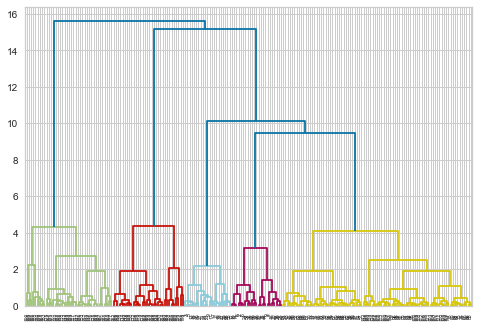

In [42]:
from scipy.cluster import hierarchy


dendrogram = hierarchy.dendrogram(
    hierarchy.linkage(StandardScaler().fit_transform(X), method = 'ward'), color_threshold=6
)

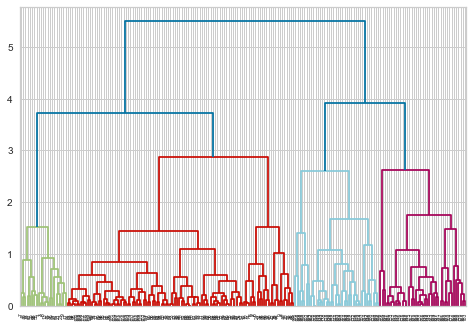

In [44]:
from scipy.cluster import hierarchy


dendrogram = hierarchy.dendrogram(
    hierarchy.linkage(StandardScaler().fit_transform(X), method = 'complete'), color_threshold=3
)

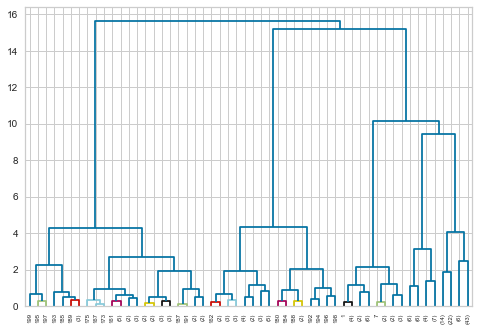

In [52]:
from scipy.cluster import hierarchy


dendrogram = hierarchy.dendrogram(hierarchy.linkage(StandardScaler().fit_transform(X), method = 'ward'), color_threshold=0.4, truncate_mode='level', p=5 )

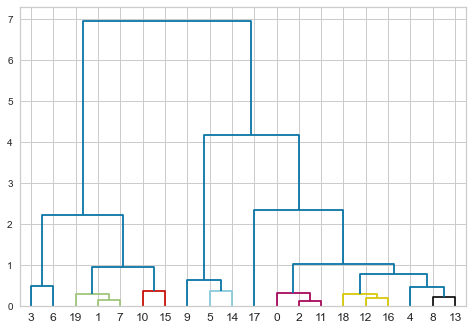

In [54]:

dendrogram = hierarchy.dendrogram(
    hierarchy.linkage(StandardScaler().fit_transform(X.sample(20)), method = 'ward'), color_threshold=0.4
)

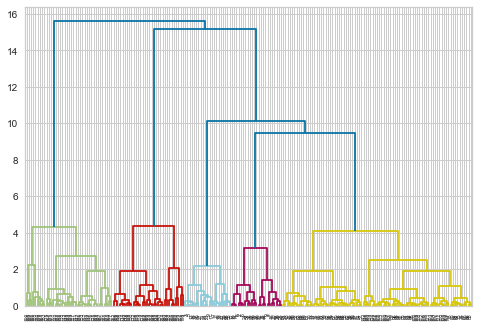

In [53]:
from scipy.cluster import hierarchy


dendrogram = hierarchy.dendrogram(hierarchy.linkage(StandardScaler().fit_transform(X), method = 'ward'), color_threshold=6 )

In [55]:
from sklearn.cluster import AgglomerativeClustering

In [56]:
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

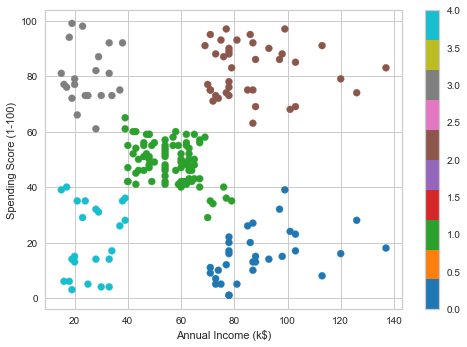

In [58]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=hierarchical.labels_, cmap='tab10')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.colorbar();

In [60]:
df['cluster'] = hierarchical.labels_

In [61]:
df.groupby('cluster').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,166.250000,41.000000,89.406250,15.593750
1,87.894118,42.482353,55.811765,49.129412
2,162.000000,32.692308,86.538462,82.128205
3,22.000000,25.333333,25.095238,80.047619
4,23.000000,45.217391,26.304348,20.913043


# Outlier Detection

In [63]:
X.loc[200, ['Annual Income (k$)','Spending Score (1-100)']] = (200, 200)

c:\programas\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Spending Score (1-100)')

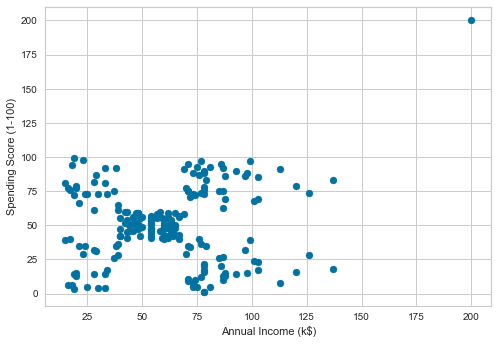

In [65]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], )
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

<IPython.core.display.Javascript object>

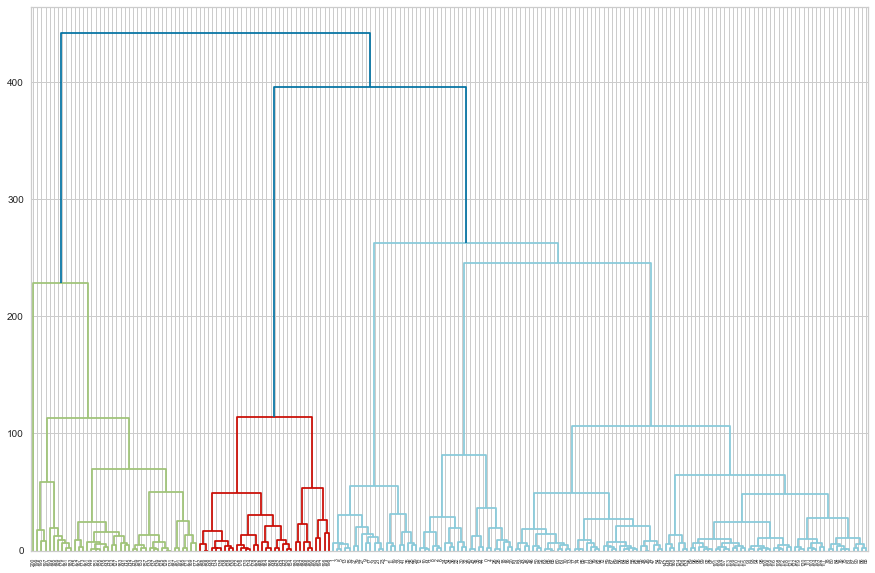

In [66]:
from scipy.cluster import hierarchy
plt.figure(figsize=(15,10))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))

In [67]:
X.loc[201, ['Annual Income (k$)','Spending Score (1-100)']] = (25, 200)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Spending Score (1-100)')

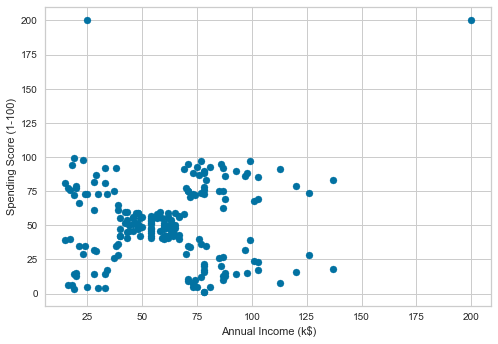

In [68]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], )
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

In [79]:
hierarchy.linkage(X, metric='cityblock', method = 'complete')

array([[ 65.,  68.,   0.,   2.],
       [ 48.,  49.,   0.,   2.],
       [129., 131.,   0.,   2.],
       [156., 158.,   0.,   2.],
       [ 21.,  23.,   1.,   2.],
       [ 51.,  53.,   1.,   2.],
       [ 63., 202.,   1.,   3.],
       [ 60.,  61.,   1.,   2.],
       [ 64.,  66.,   1.,   2.],
       [ 67.,  69.,   1.,   2.],
       [ 75.,  81.,   1.,   2.],
       [ 76.,  78.,   1.,   2.],
       [ 74.,  77.,   1.,   2.],
       [ 79.,  82.,   1.,   2.],
       [ 92.,  97.,   1.,   2.],
       [107., 113.,   1.,   2.],
       [ 94.,  98.,   1.,   2.],
       [101., 109.,   1.,   2.],
       [100., 105.,   1.,   2.],
       [103., 104.,   1.,   2.],
       [119., 120.,   1.,   2.],
       [151., 155.,   1.,   2.],
       [150., 154.,   1.,   2.],
       [170., 174.,   1.,   2.],
       [  3.,   5.,   2.,   2.],
       [ 13.,  15.,   2.,   2.],
       [  2.,   6.,   2.,   2.],
       [ 26.,  28.,   2.,   2.],
       [ 40.,  42.,   2.,   2.],
       [ 10.,  12.,   2.,   2.],
       [ 1

In [80]:
378*0.7

264.59999999999997

<IPython.core.display.Javascript object>

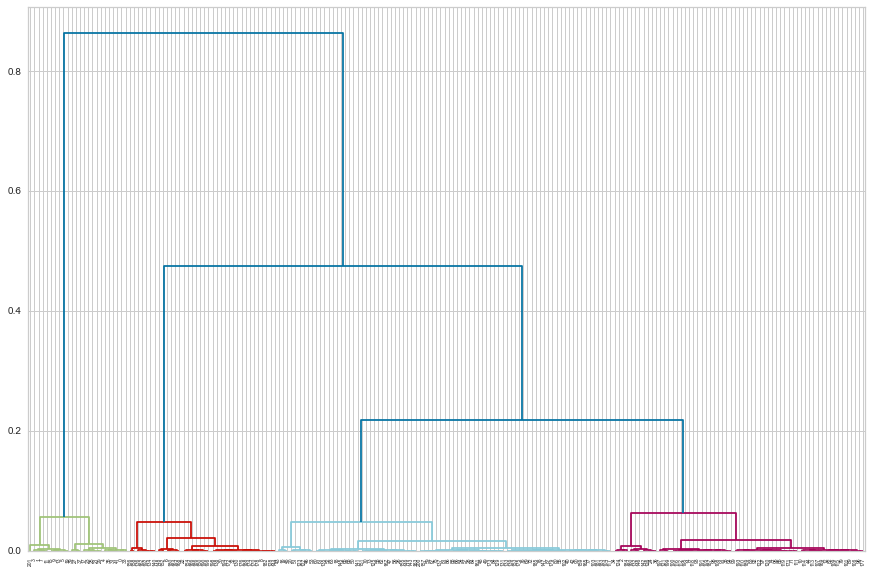

In [83]:
from scipy.cluster import hierarchy
plt.figure(figsize=(15,10))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, metric='cosine', method = 'complete'), color_threshold=0.15)

In [70]:
hierarchical = AgglomerativeClustering(7)
hierarchical.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=7)

In [84]:
hierarchical = AgglomerativeClustering(4, affinity='cosine', linkage='complete')
hierarchical.fit(X)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

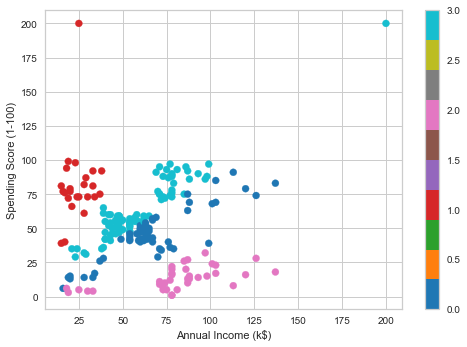

In [87]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=hierarchical.labels_, cmap='tab10')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.colorbar()

In [88]:
X.loc[202, ['Annual Income (k$)','Spending Score (1-100)']] = (-25, -200)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Spending Score (1-100)')

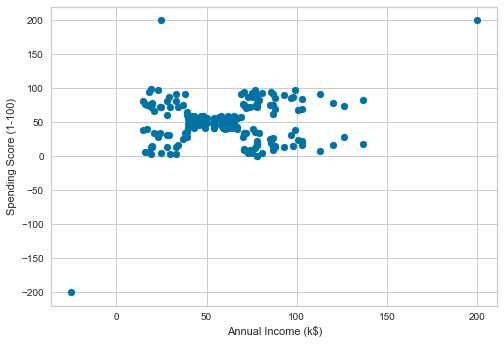

In [90]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

<IPython.core.display.Javascript object>

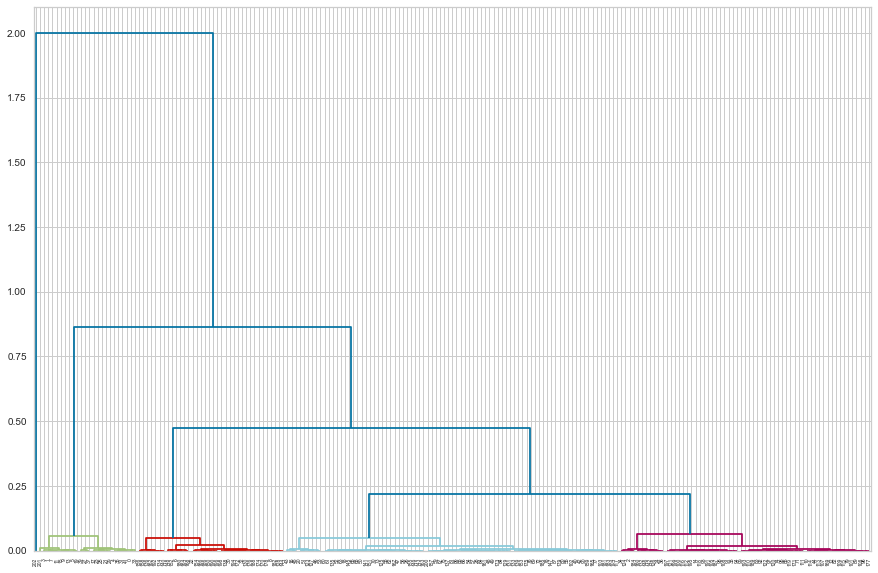

In [91]:
from scipy.cluster import hierarchy
plt.figure(figsize=(15,10))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, metric='cosine', method = 'complete'), color_threshold=0.15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

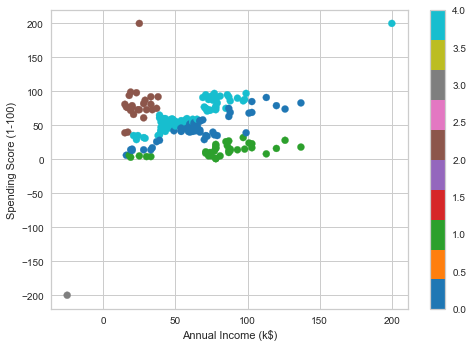

In [92]:
hierarchical = AgglomerativeClustering(5, affinity='cosine', linkage='complete')
hierarchical.fit(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=hierarchical.labels_, cmap='tab10')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.colorbar()

# More evaluation Metrics: 

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

## (Adjusted) Rand Index

Random (uniform) label assignments have a ARI score close to 0.0 

In [93]:
from sklearn import metrics
labels_true = [0, 0, 1, 1]
labels_pred = [0, 0, 1, 1]

metrics.adjusted_rand_score(labels_true, labels_pred)

1.0

In [94]:
from sklearn import metrics
labels_true = [0, 0, 1, 1]
labels_pred = [1, 1, 0, 0]

metrics.adjusted_rand_score(labels_true, labels_pred)

1.0

In [99]:
labels_true = [0, 0, 1, 2, 1, 2,2,2,2]
labels_pred = [0, 0, 1, 1, 1, 2,2,2,2]

# penalty for guessing 
metrics.adjusted_rand_score(labels_true, labels_pred)

0.608695652173913

In [100]:
labels_true = [0, 0, 1, 1]
labels_pred = [0, 1, 2, 3]

# penalizes random choices
metrics.adjusted_rand_score(labels_true, labels_pred)

0.0

In [101]:
labels_true = [0, 0, 1, 1]
labels_pred = [0, 0, 0, 0]

metrics.adjusted_rand_score(labels_true, labels_pred)

0.0

## Calinski-Harabasz Index

In [105]:
X = StandardScaler().fit_transform(X)

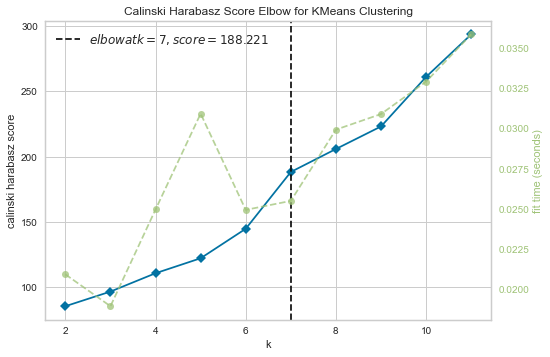

In [107]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

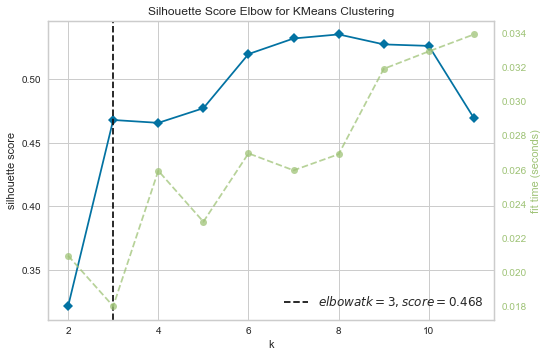

In [108]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Cool Application - Image Compression 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

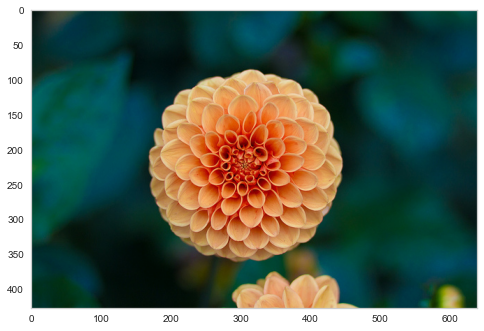

In [111]:
# Note: this requires the ``pillow`` package to be installed
# pip install Pillow
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
plt.grid(False)
plt.imshow(china);

In [115]:
china[300, 300]

array([245, 165, 128], dtype=uint8)

In [114]:
china.shape

(427, 640, 3)

In [117]:
len(np.unique(china, axis=1))

<IPython.core.display.Javascript object>

427

In [118]:
data = china / 255.0 # use 0...1 scale
data

array([[[0.00784314, 0.0745098 , 0.05098039],
        [0.01176471, 0.07058824, 0.05098039],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.00392157, 0.30196078, 0.25098039],
        [0.        , 0.29803922, 0.25098039],
        [0.        , 0.29411765, 0.24705882]],

       [[0.00392157, 0.07058824, 0.04705882],
        [0.01176471, 0.07058824, 0.05098039],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.        , 0.29803922, 0.25098039],
        [0.00392157, 0.29019608, 0.25490196],
        [0.00392157, 0.29019608, 0.25490196]],

       [[0.00784314, 0.06666667, 0.04705882],
        [0.02352941, 0.0745098 , 0.04705882],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.00392157, 0.29019608, 0.25490196],
        [0.00392157, 0.29019608, 0.2627451 ],
        [0.00392157, 0.29019608, 0.2627451 ]],

       ...,

       [[0.        , 0.18039216, 0.15686275],
        [0.00392157, 0.18823529, 0.15686275],
        [0.00392157, 0

In [119]:
data.shape

(427, 640, 3)

In [120]:
len(np.unique(data, axis=0))

<IPython.core.display.Javascript object>

427

In [121]:
# reshape image such that each pixel is now a dimension
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [150]:
from sklearn.cluster import KMeans
kmeans = KMeans(32)
kmeans.fit(data)
labels = kmeans.predict(data)

In [128]:
kmeans.cluster_centers_ 

array([[0.00467805, 0.28153695, 0.27960814],
       [0.85375327, 0.43498334, 0.18241828],
       [0.0117876 , 0.07069256, 0.04827713],
       [0.87916805, 0.66355236, 0.43165538],
       [0.78868506, 0.26117361, 0.04025937],
       [0.01988534, 0.18954439, 0.15429189],
       [0.62243356, 0.42892724, 0.22933078],
       [0.89751432, 0.75614207, 0.56435794],
       [0.75335462, 0.54169288, 0.32172468],
       [0.37754024, 0.35163255, 0.1646411 ],
       [0.03045042, 0.13619321, 0.09963938],
       [0.8829372 , 0.57698647, 0.32629168],
       [0.00267764, 0.33029356, 0.35726744],
       [0.00878437, 0.22548414, 0.22097276],
       [0.62759561, 0.05050492, 0.01609419],
       [0.17254957, 0.20965435, 0.119385  ]])

In [131]:
kmeans.labels_

array([ 2,  2,  2, ..., 10, 10, 10])

In [136]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [135]:
kmeans.cluster_centers_[kmeans.labels_]

array([[0.0117876 , 0.07069256, 0.04827713],
       [0.0117876 , 0.07069256, 0.04827713],
       [0.0117876 , 0.07069256, 0.04827713],
       ...,
       [0.03045042, 0.13619321, 0.09963938],
       [0.03045042, 0.13619321, 0.09963938],
       [0.03045042, 0.13619321, 0.09963938]])

In [137]:
new_colors = kmeans.cluster_centers_[kmeans.labels_]

In [140]:
new_colors.shape

(273280, 3)

In [147]:
china_recolored = new_colors.reshape(china.shape)
china_recolored.shape


(427, 640, 3)

<IPython.core.display.Javascript object>

[]

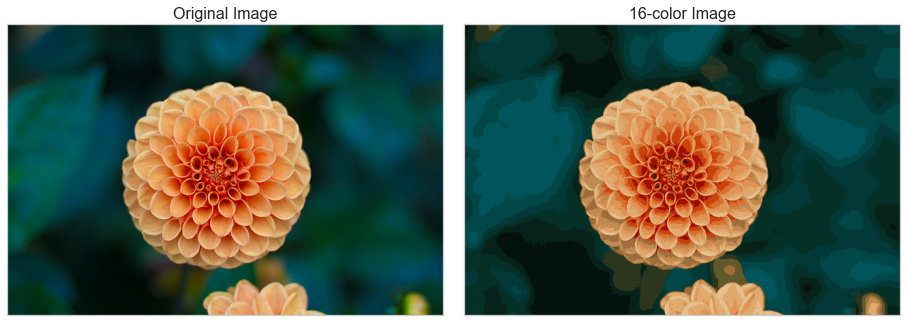

In [148]:

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])

In [149]:
plt.imsave('flower_original.png', china)
plt.imsave('flower_16.png', china_recolored)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# MiniBatchKMeans

https://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf

In [151]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(32)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.labels_]

<IPython.core.display.Javascript object>

[]

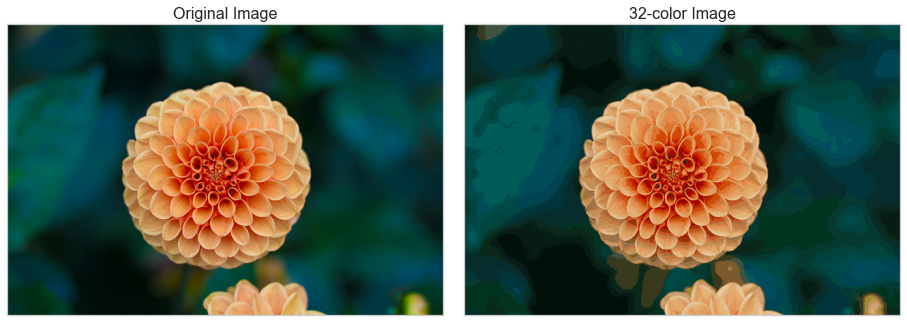

In [153]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('32-color Image', size=16);

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])